Found JSON files: ['A_exp_demo_c01_unequal_demo.json', 'B_exp_demo_c01_unequal_demo.json', 'C_exp_demo_c01_unequal_demo.json', 'D_exp_demo_c01_unequal_demo.json']
MC rep: 0
MC rep: 1
MC rep: 2
MC rep: 3
MC rep: 4
MC rep: 5
MC rep: 6
MC rep: 7
MC rep: 8
MC rep: 9
MC rep: 10
MC rep: 11
MC rep: 12
MC rep: 13
MC rep: 14
MC rep: 15
MC rep: 16
MC rep: 17
MC rep: 18
MC rep: 19
MC rep: 20
MC rep: 21
MC rep: 22
MC rep: 23
MC rep: 24
MC rep: 25
MC rep: 26
MC rep: 27
MC rep: 28
MC rep: 29
MC rep: 30
MC rep: 31
MC rep: 32
MC rep: 33
MC rep: 34
MC rep: 35
MC rep: 36
MC rep: 37
MC rep: 38
MC rep: 39
MC rep: 40
MC rep: 41
MC rep: 42
MC rep: 43
MC rep: 44
MC rep: 45
MC rep: 46
MC rep: 47
MC rep: 48
MC rep: 49
MC rep: 50
MC rep: 51
MC rep: 52
MC rep: 53
MC rep: 54
MC rep: 55
MC rep: 56
MC rep: 57
MC rep: 58
MC rep: 59
MC rep: 60
MC rep: 61
MC rep: 62
MC rep: 63
MC rep: 64
MC rep: 65
MC rep: 66
MC rep: 67
MC rep: 68
MC rep: 69
MC rep: 70
MC rep: 71
MC rep: 72
MC rep: 73
MC rep: 74
MC rep: 75
MC rep: 76


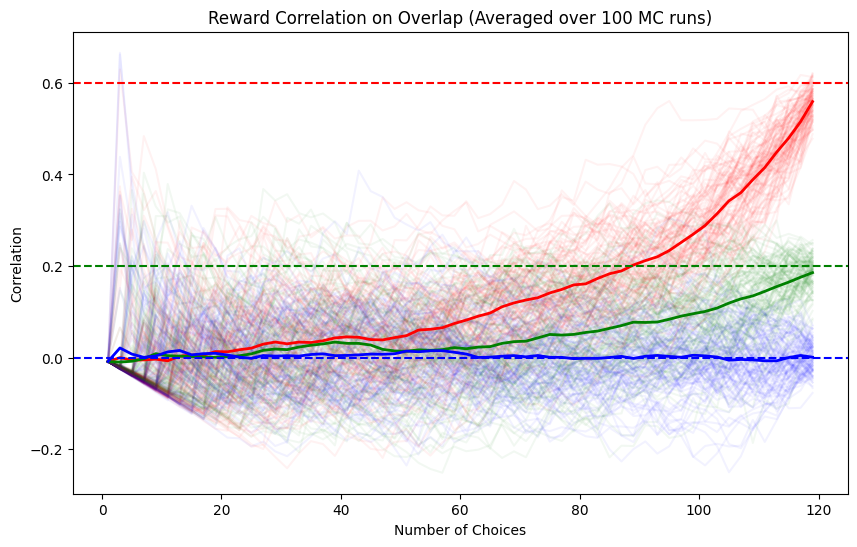

In [49]:
import sanity_check_model as scm
import numpy as np
import matplotlib.pyplot as plt


# reload functions
import importlib
importlib.reload(scm)

grid_n = 11         # width of the grid
k = 16             # number of choices
agent_n = 4         # number of agents/environments

# agent_index_to_plot = 0
env_index_to_plot = 0

env_path = "/Users/mohsenraoufi/Project/COSMOS_summerSchool/GroupProject/socialGeneralization_COSMOS25/cosmos2025_P2/environments_unequal/"
envList = scm.load_env(env_path)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['r', 'g', 'b', 'm']
## correlation values vs. number of choices
# vary the number of choices from 1 to 120
# calculaute the similarity metrics compared to the other 3 agents, and plot them as a function of number of choices
n_all_choices = grid_n * grid_n
all_choices = np.arange(n_all_choices)
# shuffle the choices for each agent
# rng = np.random.default_rng(12345)
rng = np.random.default_rng()


nMC = 100

MC_corr_arr_all = []


for MC_rep in range(nMC):
    print("MC rep:", MC_rep)
        
    shuffled_choices_agent_1 = rng.permutation(all_choices)
    shuffled_choices_agent_2 = rng.permutation(all_choices)
    shuffled_choices_agent_3 = rng.permutation(all_choices)
    shuffled_choices_agent_4 = rng.permutation(all_choices)


    all_rewards_agent_1 = scm.get_rewards(envList[0][env_index_to_plot], [{'x1': (idx // grid_n) + 1, 'x2': (idx % grid_n) + 1} for idx in shuffled_choices_agent_1])
    all_rewards_agent_2 = scm.get_rewards(envList[1][env_index_to_plot], [{'x1': (idx // grid_n) + 1, 'x2': (idx % grid_n) + 1} for idx in shuffled_choices_agent_2])
    all_rewards_agent_3 = scm.get_rewards(envList[2][env_index_to_plot], [{'x1': (idx // grid_n) + 1, 'x2': (idx % grid_n) + 1} for idx in shuffled_choices_agent_3])
    all_rewards_agent_4 = scm.get_rewards(envList[3][env_index_to_plot], [{'x1': (idx // grid_n) + 1, 'x2': (idx % grid_n) + 1} for idx in shuffled_choices_agent_4])


    num_choice_arr = np.arange(1, 120, 2)
    corr_arr_dict = []
    for n_choices in num_choice_arr:
        choice_arr_1 = shuffled_choices_agent_1[:n_choices]
        choice_arr_2 = shuffled_choices_agent_2[:n_choices]
        choice_arr_3 = shuffled_choices_agent_3[:n_choices]
        choice_arr_4 = shuffled_choices_agent_4[:n_choices]
        rewards_agent_1 = all_rewards_agent_1[:n_choices]
        rewards_agent_2 = all_rewards_agent_2[:n_choices]
        rewards_agent_3 = all_rewards_agent_3[:n_choices]
        rewards_agent_4 = all_rewards_agent_4[:n_choices]

        agents_choices = [choice_arr_1, choice_arr_2, choice_arr_3, choice_arr_4]
        agents_rewards = [rewards_agent_1, rewards_agent_2, rewards_agent_3, rewards_agent_4]

        # print("n choices:", n_choices)
        # print("choices:", agents_choices)
        # print("rewards:", agents_rewards)

        # similarity_metrics = scm.calculate_similarity_metrics(agents_choices, agents_rewards)
        corr_tmp = np.zeros((agent_n, agent_n))
        for i in range(agent_n):
            for j in range(agent_n):

                # sim_field = scm.reward_corr_on_overlap(agents_choices[i], agents_rewards[i],
                #                                 agents_choices[j], agents_rewards[j], grid_n=11)
                

                sim_field = scm.reward_map_corr(agents_choices[i], agents_rewards[i],
                                                    agents_choices[j], agents_rewards[j], grid_n=11)
                
                # sim_field = scm.kernel_alignment_similarity(agents_choices[i], agents_rewards[i],
                #                                         agents_choices[j], agents_rewards[j],
                #                                         grid_n=11, sigma=1.5)
                
                # sim_field = scm.smoothed_reward_map_corr(agents_choices[i], agents_rewards[i],
                #                                         agents_choices[j], agents_rewards[j],
                #                                         grid_n=11, sigma=3)
                
                
                
                corr_tmp[i, j] = sim_field

        corr_arr_dict.append(corr_tmp)


    corr_arr_np = np.array(corr_arr_dict)
    # print(corr_arr_np.shape)   # (num_choice, agent_n, agent_n)
    corr_arr_1_2 = corr_arr_np[:, 0, 1]
    corr_arr_1_3 = corr_arr_np[:, 0, 2]
    corr_arr_1_4 = corr_arr_np[:, 0, 3]
    # corr_arr_2_3 = corr_arr_np[:, 1, 2]
    # corr_arr_2_4 = corr_arr_np[:, 1, 3]
    # corr_arr_3_4 = corr_arr_np[:, 2, 3]

    all_corr_arr = [corr_arr_1_2, corr_arr_1_3, corr_arr_1_4]

    MC_corr_arr_all.append(all_corr_arr)

    # plt.plot(num_choice_arr, corr_arr_1_2, label='Agent 1 vs Agent 2')
    for i, corr_arr in enumerate(all_corr_arr):
        plt.plot(num_choice_arr, corr_arr, label=f'Pair {i+1}', color=colors[i], alpha=0.05)





MC_corr_arr_all_np = np.array(MC_corr_arr_all)

# make the average plot of the MC runs
mean_corr = np.nanmean(MC_corr_arr_all_np, axis=0)

for i, corr_arr in enumerate(mean_corr):
    plt.plot(num_choice_arr, corr_arr, label=f'Pair {i+1} Mean', color=colors[i], linewidth=2)
plt.xlabel('Number of Choices')
plt.ylabel('Correlation')
plt.title('Reward Correlation on Overlap (Averaged over 100 MC runs)')
# remove the legend
plt.legend().set_visible(False)

# add the ground truth as horizontal dashed lines
GT = [0.6, 0.2, 0.0]
for i, gt in enumerate(GT):
    plt.axhline(y=gt, color=colors[i], linestyle='--')
plt.show()


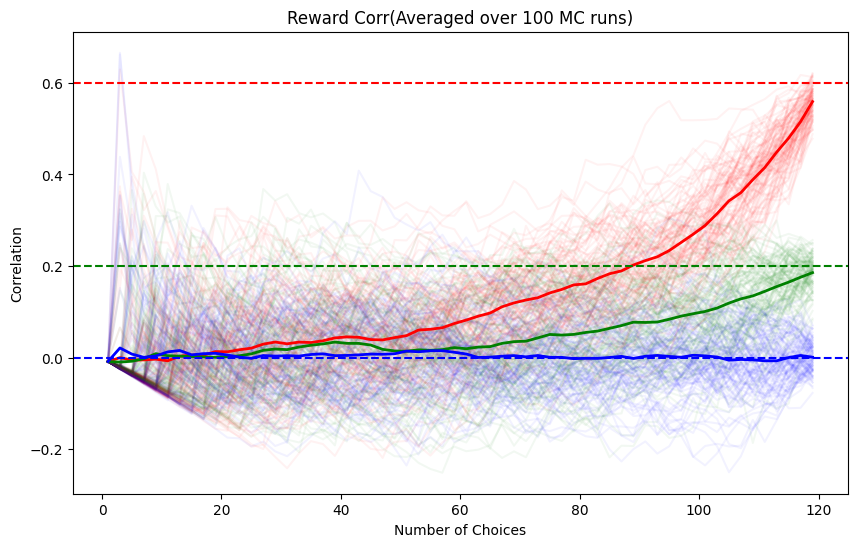

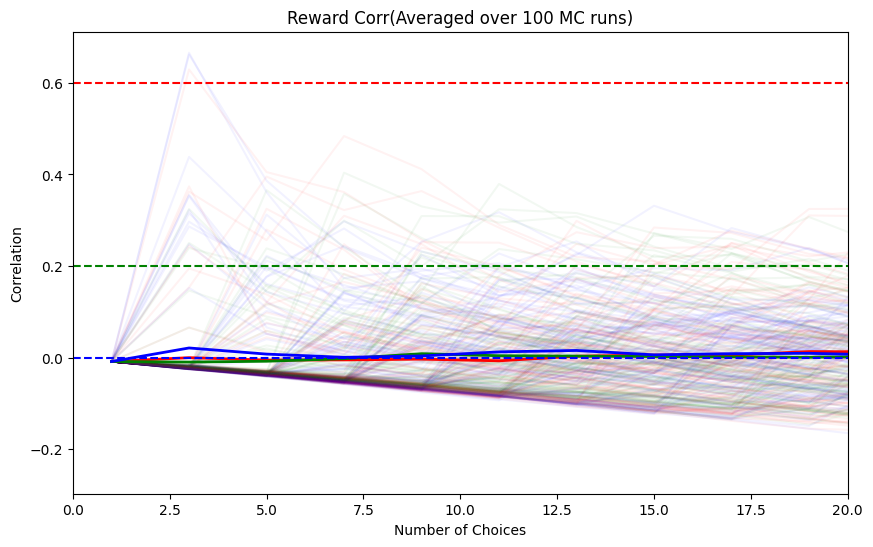

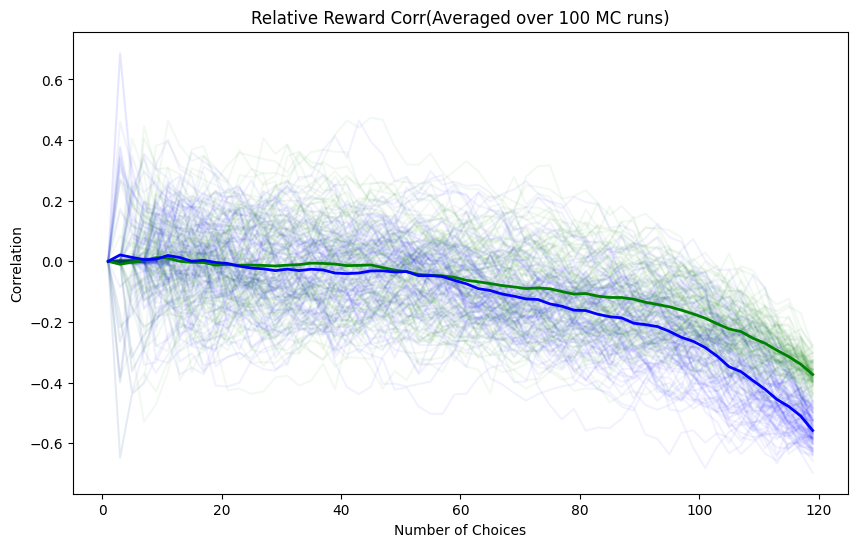

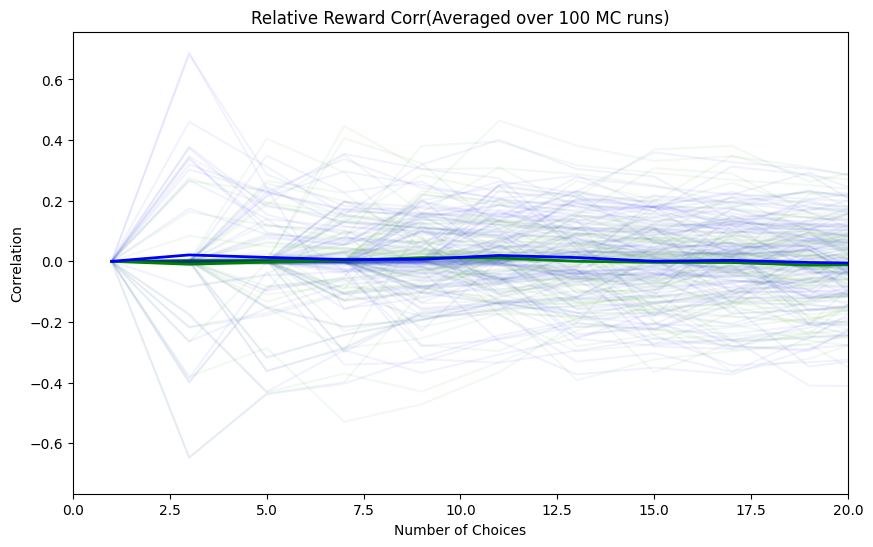

In [50]:
# separate plotting of all the data and the mean values
fig, ax = plt.subplots(figsize=(10, 6))

# correlation_metric_str = 'Reward Corr on Overlap'
correlation_metric_str = 'Reward Corr'
# correlation_metric_str = 'Kernelized Reward Corr'
# correlation_metric_str = 'Gaussian Reward Corr'


for MC_rep in range(nMC):
    for j in range(MC_corr_arr_all_np.shape[1]):
        ax.plot(num_choice_arr, MC_corr_arr_all_np[MC_rep, j, :], label=f'Pair {j+1}', color=colors[j], alpha=0.05)


# plot the mean lines
for i, corr_arr in enumerate(mean_corr):
    ax.plot(num_choice_arr, corr_arr, label=f'Pair {i+1} Mean', color=colors[i], linewidth=2)

# plot the ground truth
GT = [0.6, 0.2, 0.0]
for i, gt in enumerate(GT):
    plt.axhline(y=gt, color=colors[i], linestyle='--')
plt.xlabel('Number of Choices')
plt.ylabel('Correlation')
plt.title(correlation_metric_str + '(Averaged over 100 MC runs)')
plt.savefig(correlation_metric_str + '_all_mc.png')
plt.show()

# Zoomed in
# separate plotting of all the data and the mean values
fig, ax = plt.subplots(figsize=(10, 6))

for MC_rep in range(nMC):
    for j in range(MC_corr_arr_all_np.shape[1]):
        ax.plot(num_choice_arr, MC_corr_arr_all_np[MC_rep, j, :], label=f'Pair {j+1}', color=colors[j], alpha=0.05)


# plot the mean lines
for i, corr_arr in enumerate(mean_corr):
    ax.plot(num_choice_arr, corr_arr, label=f'Pair {i+1} Mean', color=colors[i], linewidth=2)

# plot the ground truth
GT = [0.6, 0.2, 0.0]
for i, gt in enumerate(GT):
    plt.axhline(y=gt, color=colors[i], linestyle='--')
plt.xlabel('Number of Choices')
plt.ylabel('Correlation')
plt.title(correlation_metric_str + '(Averaged over 100 MC runs)')
ax.set_xlim(0, 20)
plt.savefig(correlation_metric_str + '_all_mc_zoomed.png')
plt.show()




# calculate the relative correlation compared to the first pair
relative_corr_arr_all_np = MC_corr_arr_all_np - MC_corr_arr_all_np[:, 0:1, :]
fig, ax = plt.subplots(figsize=(10, 6))

# plot all the MC runs for the relative correlation
for MC_rep in range(nMC):
    for j in range(1, relative_corr_arr_all_np.shape[1]):
        ax.plot(num_choice_arr, relative_corr_arr_all_np[MC_rep, j, :], label=f'Pair {j+1} rel. to Pair 1', color=colors[j], alpha=0.05)

# plot the mean lines
mean_relative_corr = np.nanmean(relative_corr_arr_all_np, axis=0)
for i, corr_arr in enumerate(mean_relative_corr):
    if i == 0:
        continue
    ax.plot(num_choice_arr, corr_arr, label=f'Pair {i+1} Mean rel. to Pair 1', color=colors[i], linewidth=2)

plt.title('Relative ' + correlation_metric_str + '(Averaged over 100 MC runs)')
plt.xlabel('Number of Choices')
plt.ylabel('Correlation')
plt.savefig('Relative ' + correlation_metric_str + '_all_mc.png')
plt.show()


# zoom in
fig, ax = plt.subplots(figsize=(10, 6))
# plot all the MC runs for the relative correlation
for MC_rep in range(nMC):
    for j in range(1, relative_corr_arr_all_np.shape[1]):
        ax.plot(num_choice_arr, relative_corr_arr_all_np[MC_rep, j, :], label=f'Pair {j+1} rel. to Pair 1', color=colors[j], alpha=0.05)

# plot the mean lines
mean_relative_corr = np.nanmean(relative_corr_arr_all_np, axis=0)
for i, corr_arr in enumerate(mean_relative_corr):
    if i == 0:
        continue
    ax.plot(num_choice_arr, corr_arr, label=f'Pair {i+1} Mean rel. to Pair 1', color=colors[i], linewidth=2)
ax.set_xlim(0, 20)

plt.xlabel('Number of Choices')
plt.ylabel('Correlation')
plt.title('Relative ' + correlation_metric_str + '(Averaged over 100 MC runs)')
plt.savefig('Relative ' + correlation_metric_str + '_all_mc_zoomed.png')

plt.show()

